In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

### DETECTING ENCODING : 


In [78]:
file = open("../data/Sample - Superstore.csv", "rb")
result = chardet.detect(file.read(11000))
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


### IMPORTING AND INITIAL OVERVIEW OF DATASET :

In [79]:
sales_data = pd.read_csv("../data/Sample - Superstore.csv", encoding = 'ISO-8859-1')
sales_data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [80]:
print("Rows :", sales_data.shape[0])
print("Columns :", sales_data.shape[1])

Rows : 9994
Columns : 21


In [81]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [82]:
print(sales_data.nunique().sort_values(ascending = False))

Row ID           9994
Profit           7287
Sales            5825
Order ID         5009
Product ID       1862
Product Name     1850
Ship Date        1334
Order Date       1237
Customer ID       793
Customer Name     793
Postal Code       631
City              531
State              49
Sub-Category       17
Quantity           14
Discount           12
Region              4
Ship Mode           4
Category            3
Segment             3
Country             1
dtype: int64


In [83]:
to_plot = []
for i in sales_data.columns:
    if sales_data[i].nunique() < 20 :
        to_plot.append(i)

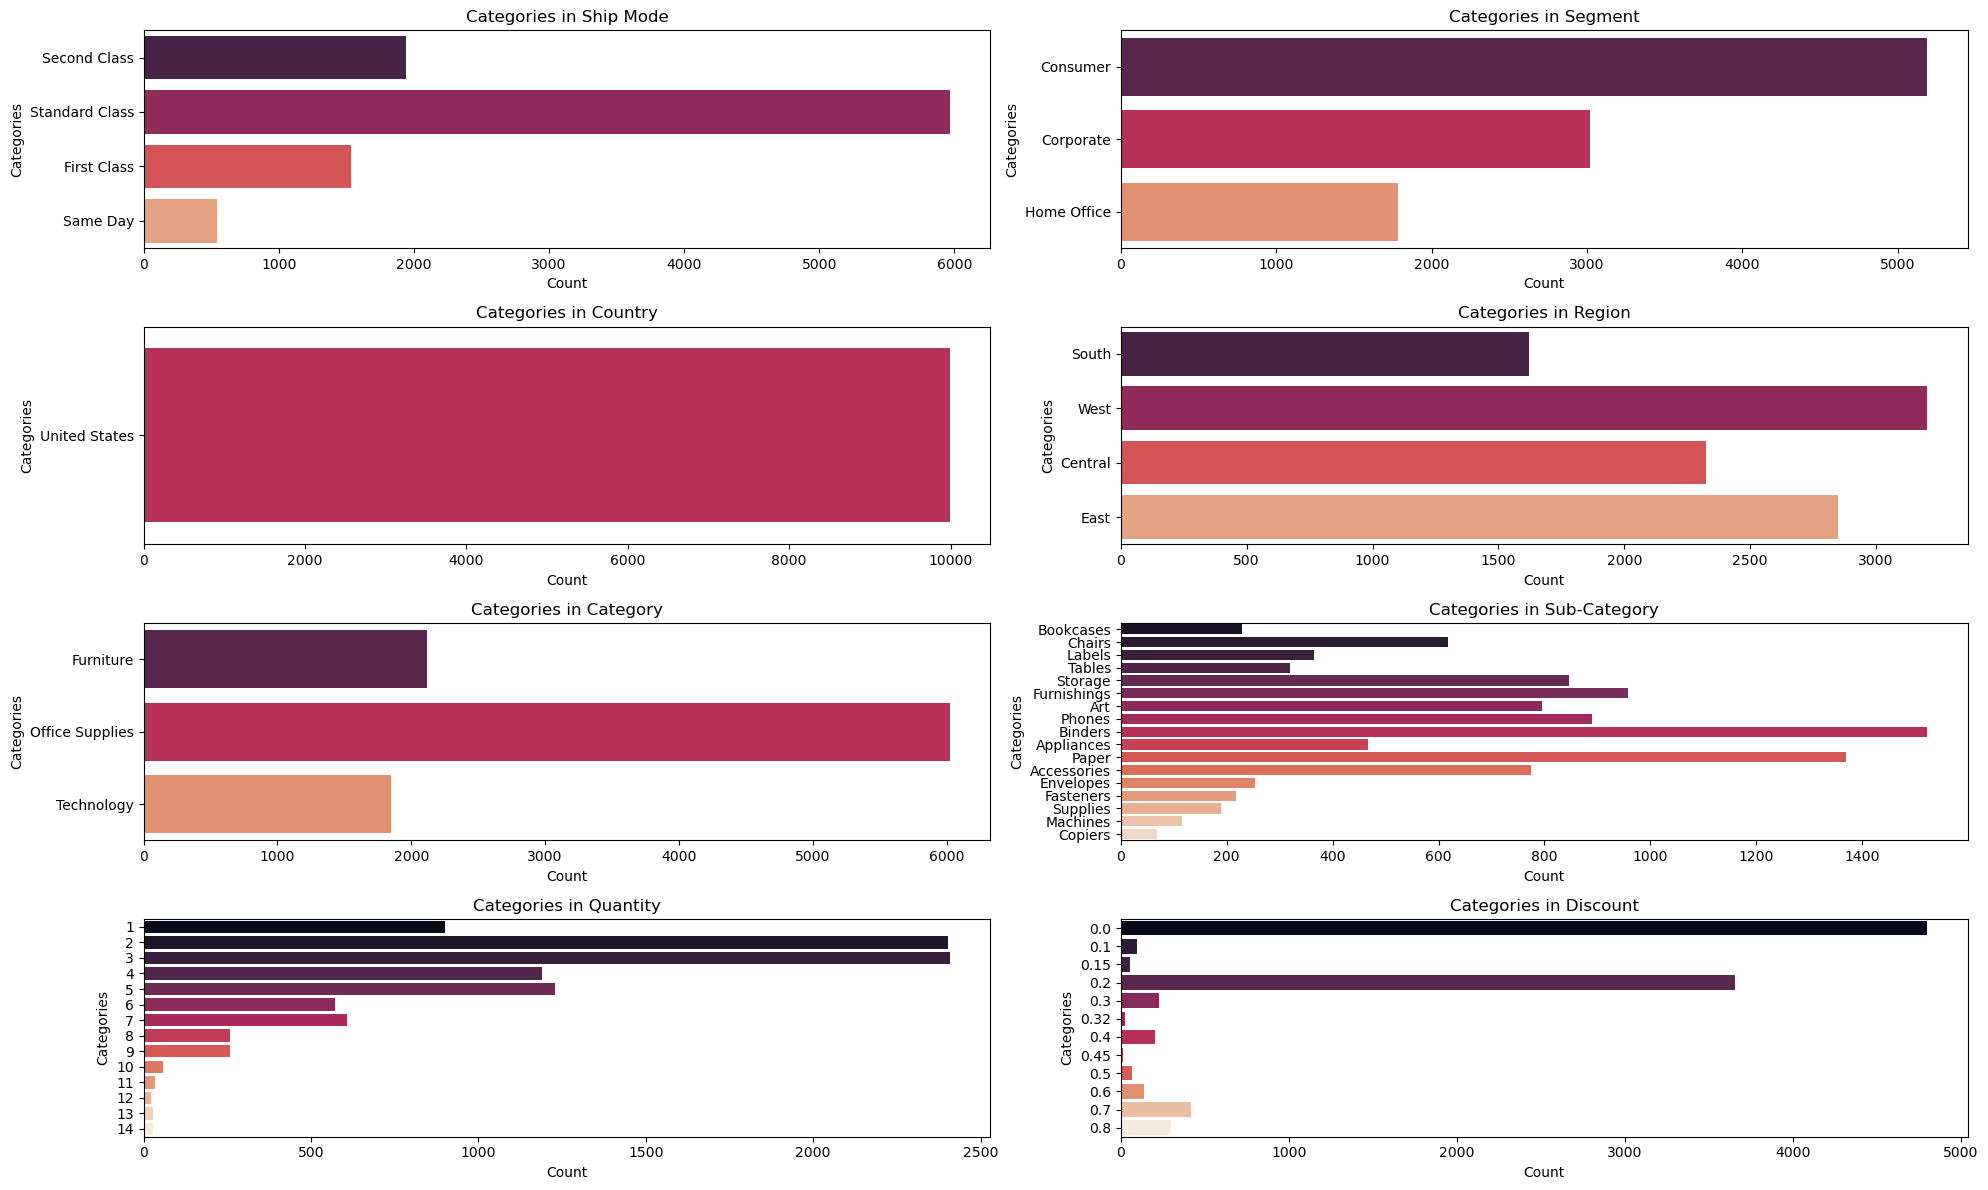

In [84]:
plt.figure(figsize = (20, 12))
for i, col in enumerate(to_plot, 1):
    plt.subplot(4, 2, i)
    sns.countplot(y = col, data = sales_data, hue = col, palette = "rocket", legend = False)
    plt.title(f"Categories in {col}")
    plt.xlabel("Count")
    plt.ylabel("Categories")

plt.tight_layout()
plt.show()



#### Insights from the Initial Overview

- No columns contain any `NULL` values.
- Column names should be standardized for ease of use.
- `Ship Date` and `Order Date` appear to be datetime columns but are currently typed as `object`.
- `Postal Code` is classified as `int64`, but it makes more sense as a categorical (`object`) type.
- Columns such as `Row ID`, `Customer ID`, and `Product ID` are likely unnecessary for the current analysis.
- The `Country` column contains a single unique value, making it redundant.

---------------------------------------------------------------------------------------------------------------------------------------


### DROPPING/STANDARDISING COLUMNS AND CHECKING FOR DUPLICATES :

In [85]:
sales_data.drop(["Country", "Row ID", "Customer ID", "Product ID"], inplace = True, axis = 1)

sales_data.columns = (
    sales_data.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

display(sales_data.head(5))

,order_id,order_date,ship_date,ship_mode,customer_name,segment,city,state,postal_code,region,category,sub-category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
